**IMPORT LIBRARIES**

In [1]:
import numpy as np
import gdal
import os
import deepgeo.common.geofunctions as gf
import deepgeo.common.visualization as vis
import deepgeo.dataset.dataset_generator as dg
import deepgeo.dataset.preprocessor as prep
import deepgeo.dataset.sequential_chips as seqchips
import deepgeo.networks.model_builder as mb

**INPUT FILE FOR PREDICTION**

In [2]:
raster_file = 'Full_Area_S2_2016_v2/FULLAREA_S2_2016_v2/S22016.tif'

**PRE PROCESS THE PREDICTED IMAGES**

In [3]:
params = { 'standardization' : 'norm_range',
         'range': {'min' : 0, 'max' : 1}}

In [3]:
preproc = prep.Preprocessor(raster_file, no_data = 0)
#preproc.remove_bands(0)
#preproc.set_nodata_value(-1)
#preproc.standardize_image(params['standardization'], params['range'])
raster_array = preproc.get_array_stacked_raster()


In [4]:
params_cg = {'raster_array': raster_array,
             'overlap': [184,184],
             'win_size': 300}

In [5]:
chip_struct = seqchips.SequentialChipGenerator(params_cg).generate_chips()

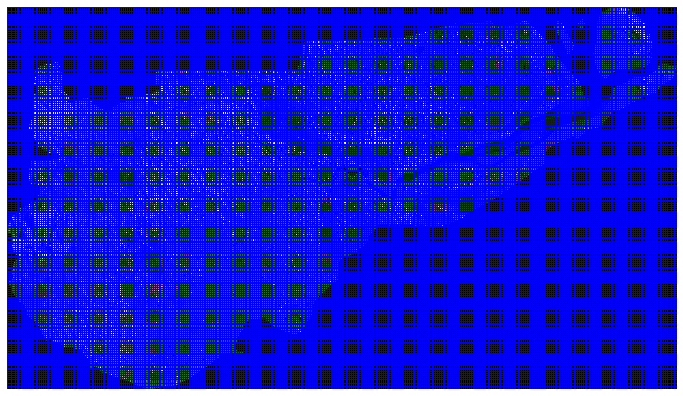

In [6]:
vis.plot_chips(chip_struct, raster_array, bands=[1, 5, 1], contrast=True)

**PREDICTION**

In [12]:
trained_model = 'Full_Area_S2_2016_v2/FULLAREA_S2_2016_v2/trained_model_0,01LR_200epochs_0,95DR_WCE'
model = mb.ModelBuilder(trained_model)
chips = model.predict(chip_struct, model_dir=trained_model)

Classifying image with structure  (18540, 300, 300, 9) ...
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from Full_Area_S2_2016_v2/FULLAREA_S2_2016_v2/trained_model_0,01LR_200epochs_0,95DR_WCE/model.ckpt-24080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [13]:
output_pred = 'Full_Area_S2_2016_v2/FULLAREA_S2_2016_v2/PredictionS2_2016_0,01LR_200epochs_0,95DR_WCE.tif'
preproc = None
raster_array = None
gf.write_pred_chips(output_pred, raster_file, chips, chip_key='predict')
#gf.write_pred_chips(output_pred_prob, raster_file, chips, chip_key='prob')

**VISUALIZING THE PREDICTION**

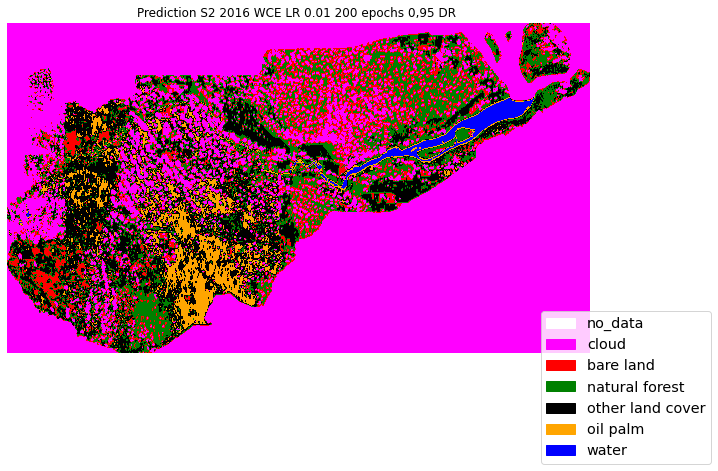

In [14]:
pred_rarr = gdal.Open(output_pred).ReadAsArray()
vis.plot_labels(pred_rarr, ['no_data', 'cloud','bare land','natural forest','other land cover','oil palm', 'water'], colors = [ 'white', 'magenta','red', 'green', 'black', 'orange', 'blue'],title= 'Prediction S2 2016 WCE LR 0.01 200 epochs 0,95 DR ')